In [ ]:
#Analyze NFL Stats with PYthon 

In [ ]:

# Step 1 Import Libraries 


In [132]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 



In [172]:
# Import library and data 
washington_commanders = pd.read_csv("C:/Users/samue/Downloads/2023_crd.csv")

#view the first 5 rows
washington_commanders.tail()

,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,Totyd_defense,PassY_defense,RushY_Defense,TO_defense
62,66,Sun,December 13,W,San Francisco 49ers,23,15,12,193,95,98,1,21,344,236,108,3
63,67,Sun,December 20,L,Seattle Seahawks,15,20,26,353,269,84,2,16,302,121,181,1
64,68,Sun,December 27,L,Carolina Panthers,13,20,20,386,278,108,4,19,280,167,113,2
65,69,Sun,January 3,W,Philadelphia Eagles,20,14,16,248,145,103,2,16,216,98,118,3
66,70,Sat,January 9,L,Tampa Bay Buccaneers,23,31,23,375,289,86,1,26,507,365,142,1


In [134]:
# Summarize the outcomes of the games using the "results" column
washington_commanders.value_counts('result')
#washington_commanders['result'].value_counts()

result
L    41
W    26
Name: count, dtype: int64

In [135]:

#Encode the results table


In [136]:
#this is a nested dictionary to encode alphanumeric values to numeric. 
result_encoder = {'result':{'W':1, 'L':0}}

washington_commanders.replace(result_encoder, inplace = True)

# check the results 
washington_commanders.value_counts('result')


result
0    41
1    26
Name: count, dtype: int64

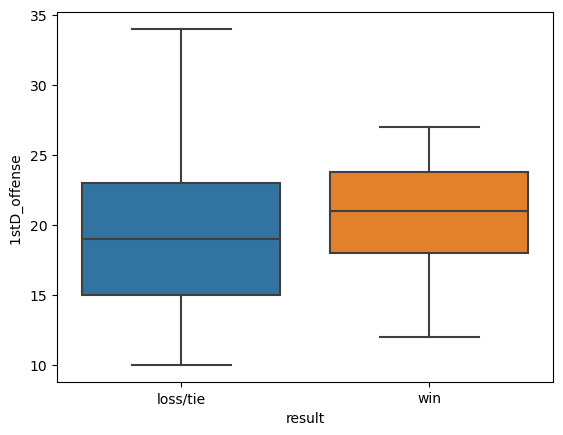

Index(['1stD_offense ', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'Totyd_defense', 'PassY_defense',
       'RushY_Defense', 'TO_defense'],
      dtype='object')


In [137]:
# change stat to view plot 
stat = washington_commanders['1stD_offense ']

#box plot of stat
stat_plot = sns.boxplot( x = 'result', y = stat, data = washington_commanders)

#plot labels 
stat_plot.set_xticklabels(['loss/tie','win'])
plt.show() 

#list feature names 

print(washington_commanders.columns[7:])

In [138]:

# Select feature variables to be scaled 
# savings the game stats from the index above to the variable features to be scaled. 

features = washington_commanders.iloc[:,7:]
scaler = StandardScaler()

#fit the transformer to the features

scaler.fit(features) 

#transform and save as X
# This is saving the game stats as the variable 'X' 

X = scaler.transform(features) 


In [139]:

# This is saving the game outcomes as the variable 'y' 

y = washington_commanders['result']


In [155]:
# create train-test split of the data 
# this function will split up or features and results labels into training data and testing data 
# test_size corresponds to the proportion of data reserved for testing. 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .289999, random_state = 42) 


In [156]:

# Run the Model 

#create the classifier 
irc = LogisticRegression()

# fit the classifier to the training data 
lrc.fit(X_train, y_train) 

LogisticRegression()

In [159]:

#Check model Accuracy 
# Predict with the classifier using the .predict() function
y_pred = lrc.predict(X_test)

# View the model accuracy with the accuracy_score() function 
accuracy_score(y_test, y_pred)

0.8

In [160]:

#The following code runs a logisics regression on our on our same data and gets and accuracy score for each combination of penalty and 'c'. 


In [168]:
# create a list of penalties 
penalties = ['l1', 'l2']

#create a list of c values 
C = [0.01, 0.1, 1.0, 10.0, 1000.0]


for penalty in penalties:
    for c in C: 

        #instantiate the classifier 
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear') 

        #fit the classifier to the training data 
        lrc_tuned.fit(X_train, y_train)

        #predict with the classifier using the predict() function 
        y_pred = lrc_tuned.predict(X_test)


        #view the model accuracy with the accuracy_score() function
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)


        #Print accuracy for each combination of penatly and C 
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C={c}') 

Accuracy: 55.0% | penalty = l1, C=0.01
Accuracy: 55.0% | penalty = l1, C=0.1
Accuracy: 75.0% | penalty = l1, C=1.0
Accuracy: 80.0% | penalty = l1, C=10.0
Accuracy: 80.0% | penalty = l1, C=1000.0
Accuracy: 70.0% | penalty = l2, C=0.01
Accuracy: 70.0% | penalty = l2, C=0.1
Accuracy: 75.0% | penalty = l2, C=1.0
Accuracy: 80.0% | penalty = l2, C=10.0
Accuracy: 80.0% | penalty = l2, C=1000.0


In [ ]:

#Save the  Optimized Model 



In [175]:
#Set the test size and hyperparameters 
test_size = 0.289999
penalty = 'l1'
C=1000.0

# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .289999, random_state = 42) 

#instantiate the classifier 
optLr = LogisticRegression(penalty = penalty, C = C, solver = 'liblinear')

#fit the classifier to the training data 
optLr.fit(X_train, y_train) 

LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')

Feature: 1stD_offense , Score: 0.67
Feature: TotYd_offense, Score: 0.07
Feature: PassY_offense, Score: 0.21
Feature: RushY_offense, Score: 0.83
Feature: TO_offense, Score: 1.07
Feature: 1stD_defense, Score: 0.3
Feature: Totyd_defense, Score: 0.97
Feature: PassY_defense, Score: 0.55
Feature: RushY_Defense, Score: 0.0
Feature: TO_defense, Score: 0.73


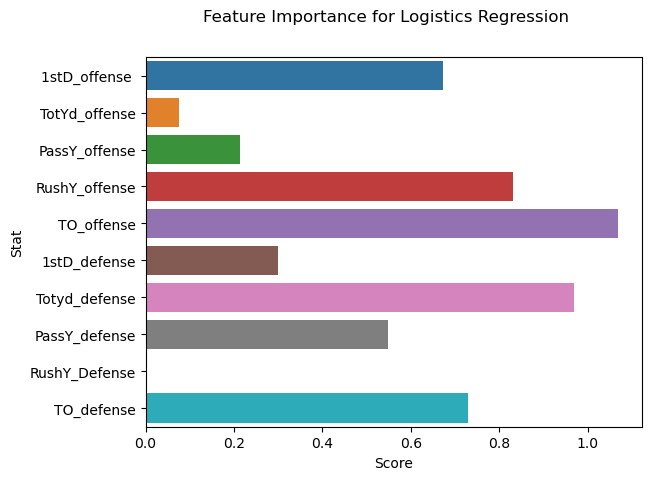

In [176]:
#Examine Feature Importance 

#get importance 
importance = abs(optLr.coef_[0])

#visualize feature importance
sns.barplot(x=importance, y=features.columns)

#add labels and titles 
plt.suptitle('Feature Importance for Logistics Regression') 
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show 

# summarize feature importance 
for i, v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

